# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [197]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [198]:
# Here are the functions already created in previous lab


def calc_slope(xs, ys):
    sl = (np.mean(xs)*np.mean(ys) - np.mean(xs*ys))/(np.mean(xs)**2 - np.mean(xs**2))
    return sl


def best_fit(xs,ys):
    c_hat = round(np.mean(ys) - (calc_slope(xs, ys)*np.mean(xs)),2)
    m_hat = round(calc_slope(xs, ys),2)
    return (m_hat, c_hat)


def reg_line (m, c, xs):
    reg_y = []
    for i in range(len(xs)):
        reg_y.append(m*xs[i] + c)
    return reg_y


def sq_err(y_real, y_pred):
    res_arr = y_real - y_pred
    sq_res_arr = list(map(lambda x: x**2, res_arr))
    return round(sum(sq_res_arr), 2)


def r_squared(y_real, y_predicted):
    tss_errors = y_real - np.mean(y_real)
    tss = sum(list(map(lambda x: x**2, tss_errors)))
    return round(1 - (sq_err(y_real, y_predicted)/tss), 2)

In [199]:
# Calculate slope of regression - should be 0.56
m = calc_slope(X, Y)
print(m)

0.5575757575757568


In [200]:
# Calculate best fit regression line (slope and intercept - should be 0.56 and 6.33)
m, c = best_fit(X, Y)
m
c

6.33

In [201]:
# Calculate y_pred values for regression line
y_pred = reg_line(m, c, X)
y_pred


[6.890000000000001,
 7.45,
 8.01,
 8.57,
 9.13,
 9.690000000000001,
 10.25,
 10.81,
 11.370000000000001,
 11.93]

In [202]:
# Calculate R^2 for regression line (should be 0.97)
r2 = r_squared(Y, y_pred)
r2

0.97

In [203]:
# Function to calculate basic regression values (m, c, R^2, model equation) from two arrays
def reg_diag(x, y):
    sl, y_int = best_fit(x, y)
    y_pr = reg_line(sl, y_int, x)
    r_2 = r_squared(y, y_pr)
    to_print =(f'Basic Regression Diagnostics\n'
            f'----------------------------\n'
            f'Slope: {sl}\n'
            f'Y-Intercept: {y_int}\n'
            f'R-Squared: {r_2}\n'
            f'----------------------------\n'
            f'Model: Y = {sl} * X + {y_int}')
    return print(to_print)

In [204]:
reg_diag(X, Y) #Got it!

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


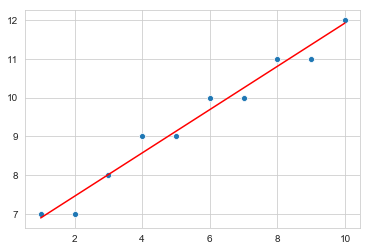

In [205]:
# Plot of data and regression line

sns.scatterplot(x=X, y=Y)
sns.lineplot(x=X, y=y_pred, color='red')


In [206]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

8.850000000000001


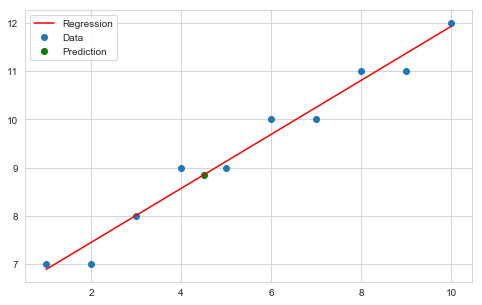

In [207]:
# Make prediction for x = 4.5 and visualize on the scatter plot

y_4_5 = m*4.5 + c
print(y_4_5)

plt.figure(figsize=(8,5))
plt.scatter(x=X, y=Y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression')
plt.scatter(4.5, y_4_5, color='green', label='Prediction')
plt.legend()
plt.show()



## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

## Level Up Below

In [208]:
df = pd.read_csv('heightWeight.csv')

In [209]:
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [210]:
# Calculate Basic Regression Diagnostics



In [211]:
reg_diag(df.height, df.weight)

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


In [212]:
regline_y = reg_line(5.54,-204.48,df.height)

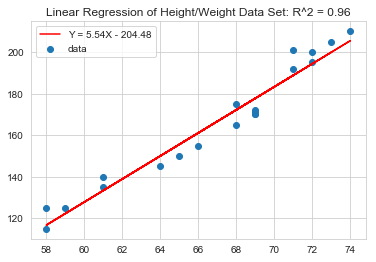

In [219]:
plt.scatter(df.height, df.weight, label='data')
plt.plot(df.height, regline_y,label='Y = 5.54X - 204.48', color='red')
plt.title('Linear Regression of Height/Weight Data Set: R^2 = 0.96')
plt.legend()